## 1. Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from random import *

## 2. Hilfsfunktionen

### Fläche berechnen

In [3]:
def getAreaSize(points):
    A = 0
    for i in range(0, len(points)-1):
        A += (points[i][0]*points[i+1][1] - points[i+1][0]*points[i][1])
    A /= 2
    return A

### Geometrische Mitte berechnen

In [4]:
def getGeometricalCentroird(points):
    #Points have format [(x0,y0), ... ,(x_n-1,y_n-1) ,(x0,y0)]
    x_s = 0
    y_s = 0
    for i in range(0, len(points)-1):
         mult_term = (points[i][0]*points[i+1][1] - points[i+1][0]*points[i][1])
         x_s += (points[i][0] + points[i+1][0])*mult_term
         y_s += (points[i][1] + points[i+1][1])*mult_term
    areaSize = getAreaSize(points) 
    x_s /= (6*areaSize)
    y_s /= (6*areaSize)
    return (x_s, y_s)

### Centroid

In [5]:
def getPointCentroid(points):
     #Points have format [(x0,y0), ... ,(x_n-1,y_n-1) ,(x0,y0)]
    (x_s, y_s) =  (0,0)
    
    for (x,y) in points[0:-1]:
        (x_s, y_s) = (x_s + x, y_s + y)
            
    amount = (len(points) -1)
    (x_s, y_s) =  (x_s/amount, y_s/amount)
    return (x_s, y_s)

### Polygone zufällig erstellen

In [6]:
def generateRandomPoints(n, epsilon):
    points = []
    grad = (2*np.pi)/n
    currentAngle = 0
    radius = 5
    
    for i in range(n):
        x = radius * np.sin(currentAngle)
        y = radius * np.cos(currentAngle)
        points.append((x,y))
        currentAngle += grad
        
    points = distrubRandomly(points, epsilon)
    points.append(points[0])
    return points

In [7]:
def distrubRandomly(points, epsilon):
    i = 0
    for (x,y) in points[0:-1]:
        x_rand = epsilon * random()
        y_rand = epsilon * random()
        points[i] = (x + x_rand,y + y_rand)
        i += 1
    return points

## 3. Spielwiese

Störung: 2eps


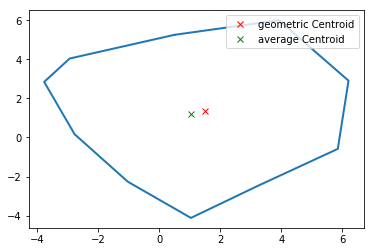

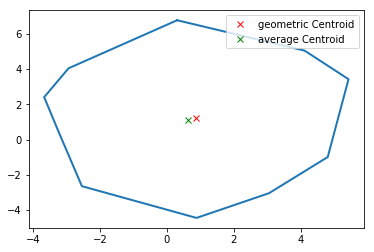

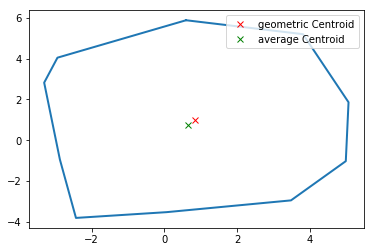

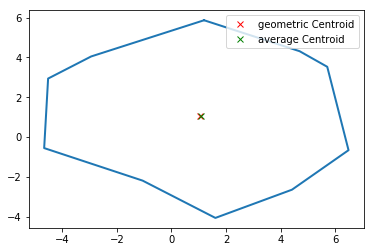

Störung: 4eps


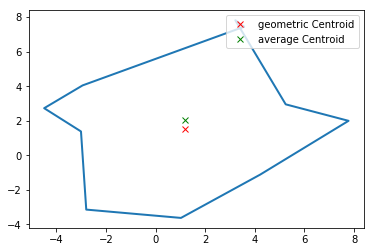

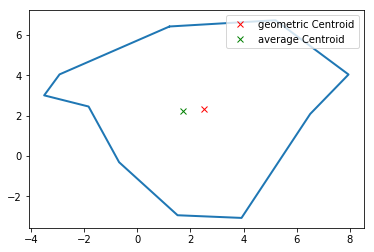

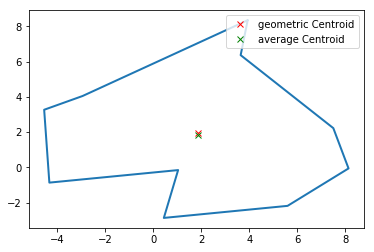

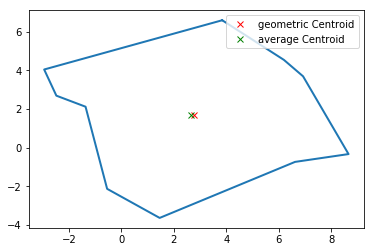

Störung: 6eps


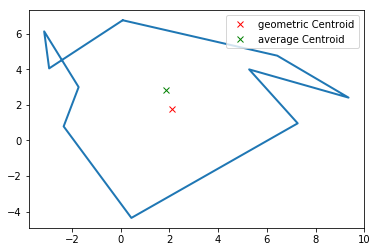

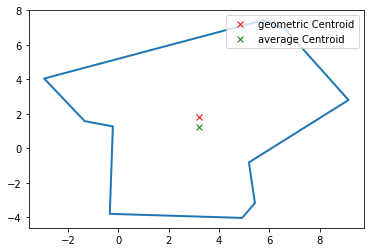

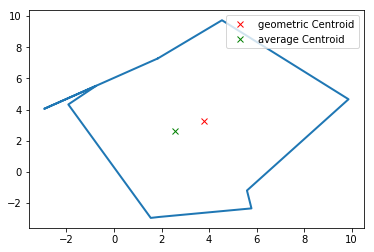

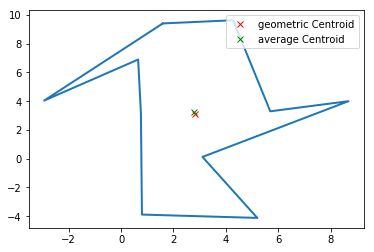

Störung: 8eps


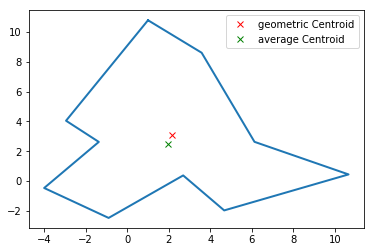

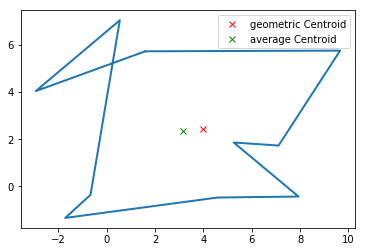

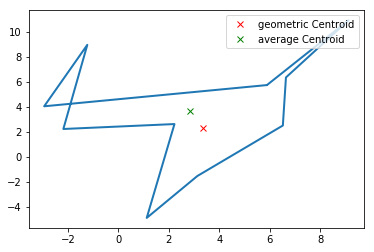

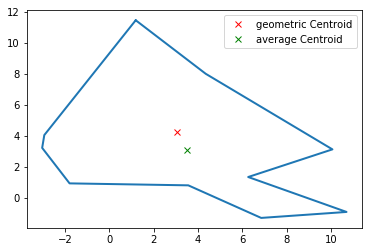

Störung: 10eps


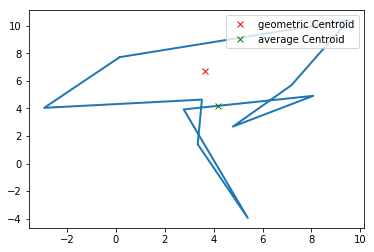

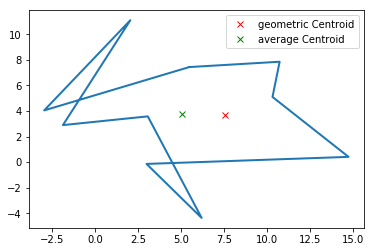

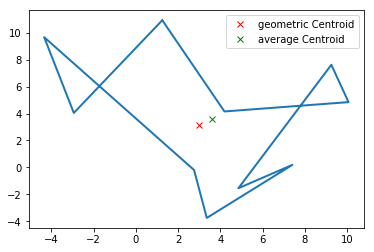

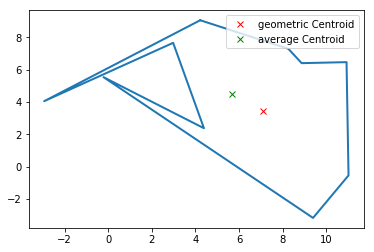

In [21]:
anzahlRunden = 5
anzahlPlots = 4
anzahlPunkte = 10
epsilon = 2

for disturb_level in range (1, anzahlRunden+1):
    distrubance = disturb_level * epsilon
    print('Störung: ' + str(distrubance) + 'eps')
    for round in range(anzahlPlots):
        points = generateRandomPoints(anzahlPunkte, distrubance)
        #points = [(0,0),(2.25,1),(2.25,4),(4.5,5),(4.5,8),(6.75,9),(6.75,12),(4.5,13),(2.25,12),(0,13),(0,16),(-2.25,17),(-4.5,16),(-4.5,13),(-2.25,12),(-2.25,9),(-4.5,8),(-4.5,5),(-2.25,4),(-2.25,1),(0,0)]
        #points = [(1,-2),  (4,-1), (3,7),(1,7), (-1,2), (1,-2)]
        x_koords = [x for (x,y) in points]
        y_koords = [y for (x,y) in points]

        (x_s, y_s) = getGeometricalCentroird(points)
        (x_c, y_c) = getPointCentroid(points)
        
        
        #plt.figure(figsize=(14, 19), dpi=80)
        
        #plt.xlim(-7, 7)
        #plt.ylim(-1, 18)
        
        plt.plot(x_koords, y_koords, linewidth=2, solid_capstyle='round', zorder=2)
        
        plt.plot(x_s, y_s, 'xr', label='geometric Centroid')
        plt.plot(x_c, y_c, 'xg', label='average Centroid')
        
        plt.legend(loc='upper right')
        plt.show()

        #Grün = Punkte Zentrieren
        #Rot = Flächenschwrpunkt